In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_train = pd.read_csv('bigmart_train.csv')

In [3]:
df_train.shape

(8523, 12)

In [4]:
df_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [5]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

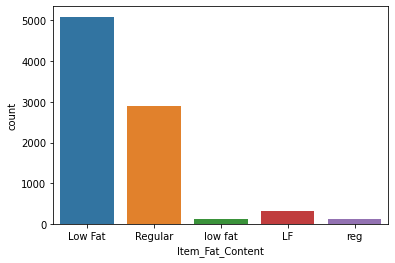

In [6]:
sns.countplot(x='Item_Fat_Content',data=df_train)

In [7]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [9]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

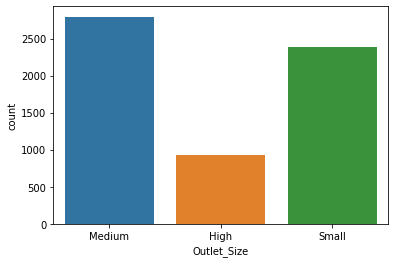

In [11]:
sns.countplot(x='Outlet_Size',data=df_train)

In [12]:
df_train['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

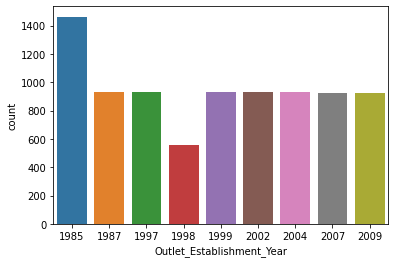

In [13]:
sns.countplot(x='Outlet_Establishment_Year',data=df_train)

In [14]:
df_train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

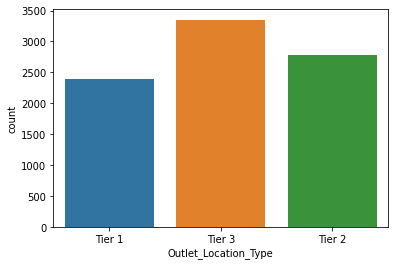

In [15]:
sns.countplot(x='Outlet_Location_Type',data=df_train)

In [16]:
df_train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

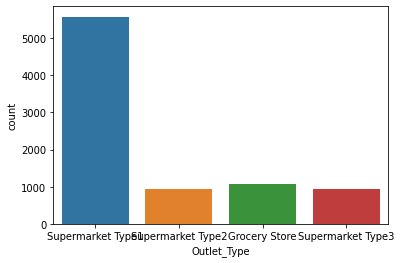

In [17]:
sns.countplot(x='Outlet_Type',data=df_train)

In [18]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
df_train['Outlet_Age']=2021-df_train['Outlet_Establishment_Year']

### Missing Values:

In [20]:
df_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Outlet_Age                      0
dtype: int64

In [21]:
df_train['Item_Weight']= df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

In [22]:
# df_train['Outlet_Size'].mode()[0]
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [23]:
df_train['Outlet_Size'].fillna('Medium',inplace=True)

In [24]:
df_train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64

### Outilers:

<AxesSubplot:>

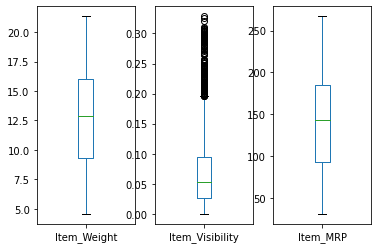

In [25]:
a,b = plt.subplots(1,3)
df_train['Item_Weight'].plot(kind='box',ax=b[0])
df_train['Item_Visibility'].plot(kind='box',ax=b[1])
df_train['Item_MRP'].plot(kind='box',ax=b[2])

<AxesSubplot:>

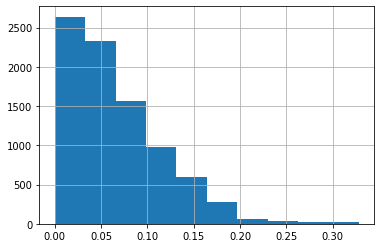

In [26]:

df_train['Item_Visibility'].hist()

<img src=IQR_Outliers.png>

In [27]:
Q1 = df_train['Item_Visibility'].quantile(.25)

Q3 = df_train['Item_Visibility'].quantile(.75)

IQR = Q3 -Q1

df2= df_train.query('(@Q1- 1.5* @IQR) <= Item_Visibility <= (@Q3 +1.5* @IQR)')

In [28]:
df2.shape

(8379, 13)

In [29]:
Q1-1.5*IQR, Q1, IQR, Q3,   Q3+1.5*IQR

(-0.07440424500000001, 0.0269894775, 0.067595815, 0.0945852925, 0.195979015)

In [30]:
df2['Item_Visibility'].describe()

count    8379.000000
mean        0.063061
std         0.046130
min         0.000000
25%         0.026789
50%         0.052729
75%         0.092277
max         0.195721
Name: Item_Visibility, dtype: float64

***

In [31]:
df_train=df2

In [32]:
df_train.shape

(8379, 13)

In [33]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [34]:
df_train['Item_Fat_Content']= df_train['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

In [35]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'reg'], dtype=object)

In [36]:
df_train['Item_Fat_Content']= df_train['Item_Fat_Content'].replace('reg','Regular')

In [37]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

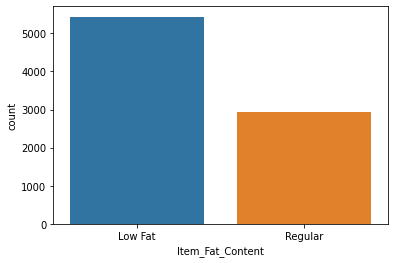

In [38]:
sns.countplot(x='Item_Fat_Content',data=df_train)

In [39]:
df_train['Item_Visibility'].value_counts().count()

7736

<AxesSubplot:>

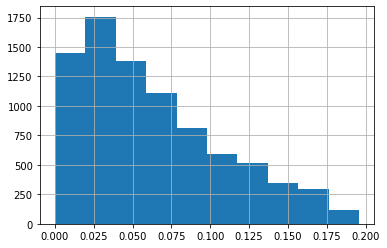

In [40]:

df_train['Item_Visibility'].hist()

### converting into Categorical values:

In [41]:
df_train['Item_Visibility']=pd.cut(df_train['Item_Visibility'],[0,0.075,0.15,0.2],labels=['Low Viz','Viz', 'High Viz'])


In [42]:
df_train['Item_Visibility'].value_counts()

Low Viz     4945
Viz         2402
High Viz     506
Name: Item_Visibility, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

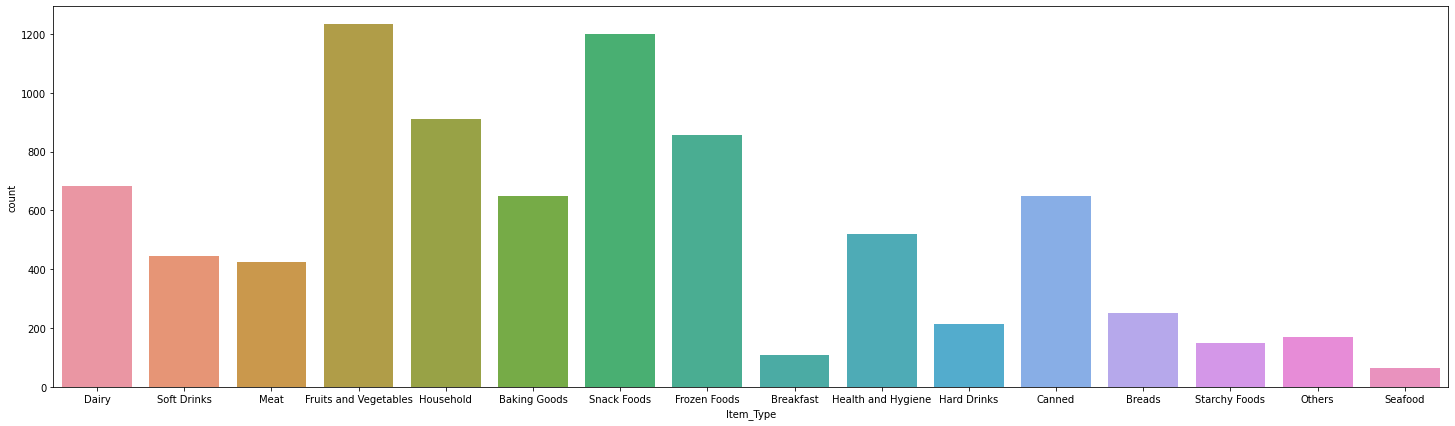

In [8]:
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type',data=df_train)

In [43]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,Low Fat,Low Viz,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,DRC01,5.920,Regular,Low Viz,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,FDN15,17.500,Low Fat,Low Viz,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,FDX07,19.200,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,NCD19,8.930,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,Low Viz,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,34
8519,FDS36,8.380,Regular,Low Viz,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,19
8520,NCJ29,10.600,Low Fat,Low Viz,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,17
8521,FDN46,7.210,Regular,Viz,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,12


### Label Encoding:

In [44]:
var=['Item_Fat_Content','Item_Visibility','Outlet_Size' ,'Outlet_Location_Type']

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le=LabelEncoder()

In [47]:
for i in var:
    df_train[i]=le.fit_transform(df_train[i])

In [48]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.300,0,1,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,22
1,DRC01,5.920,1,1,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,12
2,FDN15,17.500,0,1,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,22
3,FDX07,19.200,1,3,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,23
4,NCD19,8.930,0,3,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,1,Snack Foods,214.5218,OUT013,1987,0,2,Supermarket Type1,2778.3834,34
8519,FDS36,8.380,1,1,Baking Goods,108.1570,OUT045,2002,1,1,Supermarket Type1,549.2850,19
8520,NCJ29,10.600,0,1,Health and Hygiene,85.1224,OUT035,2004,2,1,Supermarket Type1,1193.1136,17
8521,FDN46,7.210,1,2,Snack Foods,103.1332,OUT018,2009,1,2,Supermarket Type2,1845.5976,12


### One Hot Encoding:

In [49]:
df_train=pd.get_dummies(df_train,columns=['Outlet_Type'])

In [51]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,1,Dairy,249.8092,OUT049,1999,1,0,3735.1380,22,0,1,0,0
1,DRC01,5.92,1,1,Soft Drinks,48.2692,OUT018,2009,1,2,443.4228,12,0,0,1,0


***
### X, y:

In [52]:
X=df_train.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year', 'Item_Outlet_Sales'],axis=1)

In [53]:
X

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Age,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,1,249.8092,1,0,22,0,1,0,0
1,5.920,1,1,48.2692,1,2,12,0,0,1,0
2,17.500,0,1,141.6180,1,0,22,0,1,0,0
3,19.200,1,3,182.0950,1,2,23,1,0,0,0
4,8.930,0,3,53.8614,0,2,34,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,1,214.5218,0,2,34,0,1,0,0
8519,8.380,1,1,108.1570,1,1,19,0,1,0,0
8520,10.600,0,1,85.1224,2,1,17,0,1,0,0
8521,7.210,1,2,103.1332,1,2,12,0,0,1,0


In [54]:
y=df_train['Item_Outlet_Sales']

In [55]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

In [56]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [57]:
lr.score(X_test,y_test)

0.5650293476837864

In [60]:
y_pred=lr.predict(X_test)

In [58]:
from  sklearn.metrics import mean_squared_error

In [62]:
from math import sqrt

In [63]:
sqrt(mean_squared_error(y_test,y_pred))

1096.5436624628737